# Estadística

**Nota:** Los siguientes ejercicios están basados en las notas de clase disponibles en: https://github.com/ITAM-DS/Propedeutico/tree/master/R/clases/3_estadistica.

In [1]:
options(repr.plot.width=4, repr.plot.height=4) #esta línea sólo se ejecuta para jupyterlab con R

In [ ]:
library(prob)

## Ejercicio 1
Considérese el experimento de lanzar $20$ veces una moneda y obtener la secuencia: $H,T,H,H,T,H,H,T,H,H,T,T,H,T,T,T,H,H,H,T$.

**A** Tabular los resultados del experimento anterior encontrando las proporciones de $H$ y $T$ en los $20$ lanzamientos.

In [23]:
res_secuencia <- c('H','T','H','H','T','H','H','T','H','H','T','T','H','T','T','T','H','H','H','T')
caras <- table(res_secuencia)
caras

res_secuencia
 H  T 
11  9 

**B.** Graficar las proporciones con barplot y plot.

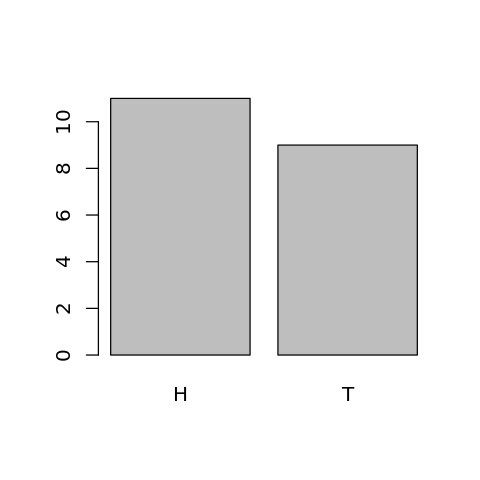

In [24]:
# barplot
barplot(caras)

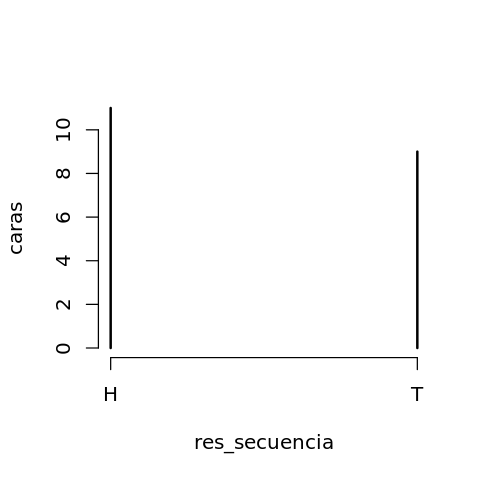

In [25]:
# plot
plot(caras)

## Ejercicio 2
Para el dataset analizado anteriormente y que se creó log_mammals (abajo se reconstruye),realizar:

In [ ]:
options(digits = 7)#para imprimir 7 número de dígitos en el summary
library(MASS)

In [27]:
log_mammals <- log(mammals)
colnames(log_mammals) <- c('log_body', 'log_brain')
head(log_mammals)

,log_body,log_brain
,<dbl>,<dbl>
Arctic fox,1.2193539,3.795489
Owl monkey,-0.7339692,2.740840
Mountain beaver,0.3001046,2.091864
Cow,6.1420374,6.047372
Grey wolf,3.5926438,4.783316
Goat,3.3199873,4.744932


In [28]:
summary(log_mammals)

    log_body         log_brain     
 Min.   :-5.2983   Min.   :-1.966  
 1st Qu.:-0.5203   1st Qu.: 1.442  
 Median : 1.2066   Median : 2.848  
 Mean   : 1.3375   Mean   : 3.140  
 3rd Qu.: 3.8639   3rd Qu.: 5.111  
 Max.   : 8.8030   Max.   : 8.650  

**A.** Para datos cuantitativos es común realizar diagramas de tallos y hojas. Investigar la interpretación de estos diagramas y usar la función stem del paquete base de R para realizar tales diagramas a las variables log_body y log_brain e interpretarlas.

In [29]:
log_mammals_m <- as.matrix(log_mammals) # convertir a una matriz los datos

In [30]:
summary(log_mammals_m[,1])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-5.2983 -0.5203  1.2066  1.3375  3.8639  8.8030 

In [31]:
print('Diagrama de tallo y hojas de log_body')
print('Los datos estan en log(kgs)')
stem(log_mammals_m[,1])

[1] "Diagrama de tallo y hojas de log_body"
[1] "Los datos estan en log(kgs)"

  The decimal point is at the |

  -4 | 36
  -2 | 880863311
  -0 | 639763211
   0 | 00333557912233344459
   2 | 347366
   4 | 00114612335
   6 | 1338
   8 | 8



* El diagrama de tallo y hojas para el logaritmo del peso del cerebro los mamíferos (medido en gramos), se expresa en unidades y se presenta de forma descendente. Estos diagramas son útiles para identificar la moda en un conjunto de datos, para este caso es notorio que la mayoría del pesos del cuerpo en kgs se ubican en torno a un logarítmo del peso de su cerebro cercano a las cero unidades, y especialmente 0.3. También nos da una vaga idea de la distribución de los datos.

In [32]:
print('Diagrama de tallo y hojas de log_brain')
print('Los datos estan en log(gs)')
stem(log_mammals_m[,2])

[1] "Diagrama de tallo y hojas de log_brain"
[1] "Los datos estan en log(gs)"

  The decimal point is at the |

  -2 | 0
  -0 | 4219
   0 | 00269901344677899
   2 | 1445555789022789
   4 | 01467781122228
   6 | 00012552
   8 | 47



* El diagrama de tallo y hojas para el logaritmo del peso del cerebro de los mamíferos (medido en gramos) presentado anteriormente indica que el logaritmo del peso de los mmíferos se expresa en unidades para la totalidad de la muestra y la moda se encuentra en torno a valores del 0 y 2 con respectivos decimales, en particular de 2.9. De igual forma, nos da una vaga idea de la distribución de los datos.

**B.**  scatterplot coloreando diferente a cada grupo que se creó: mamífero pequeño y mamífero grande con la variable size_body.

In [33]:
library(ggplot2)

In [34]:
mediana_body = median(log_mammals$log_body)
log_mammals$size_body = ifelse(log_mammals$log_body >= mediana_body, "grande", "pequenio")
#añadimos también la de brain:
mediana_brain = median(log_mammals$log_brain)
log_mammals$size_brain = ifelse(log_mammals$log_brain >= mediana_brain, "grande", "pequenio")

In [35]:
head(log_mammals)

,log_body,log_brain,size_body,size_brain
,<dbl>,<dbl>,<chr>,<chr>
Arctic fox,1.2193539,3.795489,grande,grande
Owl monkey,-0.7339692,2.740840,pequenio,pequenio
Mountain beaver,0.3001046,2.091864,pequenio,pequenio
Cow,6.1420374,6.047372,grande,grande
Grey wolf,3.5926438,4.783316,grande,grande
Goat,3.3199873,4.744932,grande,grande


scartter plot solo utilizando plot del base (ver punto posterior, donde se pide ggplot)

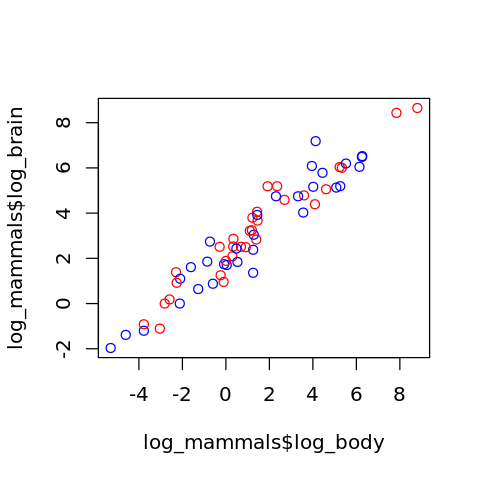

In [36]:
plot(log_mammals$log_body, log_mammals$log_brain, col=c('red', 'blue'))

**C.** Instalar el paquete dplyr para colocar los datos en un formato long y se pueda graficar con el paquete de ggplot2 con la función gather el dataframe log_mammals. Después de instalar tal paquete, realizar mismo enunciado que a) pero con geom_points y paquete ggplot2.

In [ ]:
library("tidyverse")

In [37]:
head(log_mammals)

,log_body,log_brain,size_body,size_brain
,<dbl>,<dbl>,<chr>,<chr>
Arctic fox,1.2193539,3.795489,grande,grande
Owl monkey,-0.7339692,2.740840,pequenio,pequenio
Mountain beaver,0.3001046,2.091864,pequenio,pequenio
Cow,6.1420374,6.047372,grande,grande
Grey wolf,3.5926438,4.783316,grande,grande
Goat,3.3199873,4.744932,grande,grande


In [40]:
lng_log_mammals <- gather(log_mammals, "variable", "colum", c(log_body, log_brain)) # para no me mande a flong estas dos variables
head(lng_log_mammals)

size_body,size_brain,variable,colum
<chr>,<chr>,<chr>,<dbl>
grande,grande,log_body,1.2193539
pequenio,pequenio,log_body,-0.7339692
pequenio,pequenio,log_body,0.3001046
grande,grande,log_body,6.1420374
grande,grande,log_body,3.5926438
grande,grande,log_body,3.3199873


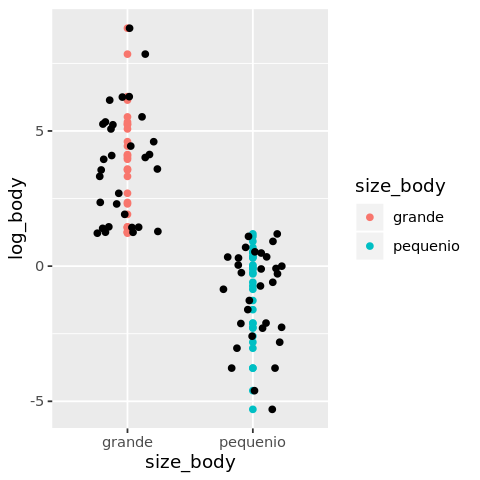

In [41]:
# utiizar tamaño del cuerpo como separador de los colores size_body (col cambia a color en ggplot)
ggplot(log_mammals, aes(size_body, log_body)) +
  geom_point(aes(color=size_body)) +
  geom_jitter(width = 0.25)

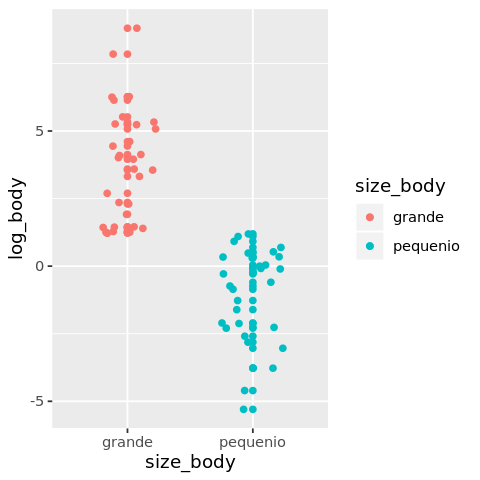

In [42]:
ggplot(log_mammals, aes(size_body, log_body,color=size_body)) +
  geom_point()+
  geom_jitter(width = 0.25)

**D.** Calcular estadísticas como el promedio, mediana, máximo y mínimo por grupos de mamífero pequeño y mamífero grande con dplyr y funciones como group_by, sumarise y el operador %>% (pipe). Ver como ayuda: Data Wrangling with dplyr and tidyr o Data Transformation with dplyr o bien como ejemplo de uso: https://genomicsclass.github.io/book/pages/dplyr_tutorial.html u otro tutorial en la red de dplyr ¿qué mamíferos en cada grupo están en los tres primeros lugares (pensando que se ordenan de forma decreciente en log_brain)?.

In [64]:
# calculando estadísticas para el logaritmo del peso del cuerpo por grupos de tamaño de cuerpo (grande y pequeño)
log_mammals %>% 
    group_by(size_body) %>%
    summarise(prom_lbody = mean(log_body),
              mediana_lbody = median(log_body),
              min_lbody = min(log_body), 
              max_lbody = max(log_body),
              total = n())

size_body,prom_lbody,mediana_lbody,min_lbody,max_lbody,total
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
grande,3.788697,3.954316,1.219354,8.802973,31
pequenio,-1.113619,-0.597837,-5.298317,1.193922,31


In [62]:
# calculando estadísticas para el logaritmo del peso del cuerpo por grupos de tamaño de cerebro (grande y pequeño)
log_mammals %>% 
    group_by(size_brain) %>%
    summarise(prom_lbody = mean(log_body),
              mediana_lbody = median(log_body),
              min_lbody = min(log_body), 
              max_lbody = max(log_body),
              total = n())

size_brain,prom_lbody,mediana_lbody,min_lbody,max_lbody,total
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
grande,3.747790,3.954316,0.3435897,8.802973,31
pequenio,-1.072712,-0.597837,-5.2983174,1.398717,31


In [65]:
# calculando estadísticas para el logaritmo del peso del cuerpo por grupos de tamaño de cerebro (grande y pequeño)
log_mammals %>% 
    group_by(size_brain) %>%
    summarise(prom_lbody = mean(log_body),
              mediana_lbody = median(log_body),
              min_lbody = min(log_body), 
              max_lbody = max(log_body),
              total = n())

size_brain,prom_lbody,mediana_lbody,min_lbody,max_lbody,total
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
grande,3.747790,3.954316,0.3435897,8.802973,31
pequenio,-1.072712,-0.597837,-5.2983174,1.398717,31


In [66]:
# calculando estadísticas para el logaritmo del peso del cerebro por grupos de tamaño de cuerpo (grande y pequeño)
log_mammals %>% 
    group_by(size_body) %>%
    summarise(prom_lbrain = mean(log_brain),
              mediana_lbrain = median(log_brain),
              min_lbrain = min(log_brain), 
              max_lbrain = max(log_brain),
              total = n())

size_body,prom_lbrain,mediana_lbrain,min_lbrain,max_lbrain,total
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
grande,5.054768,5.129899,1.360977,8.650325,31
pequenio,1.225628,1.609438,-1.966113,3.242592,31


In [67]:
# calculando estadísticas para el logaritmo del peso del cerebro por grupos de tamaño de cerebro (grande y pequeño)
log_mammals %>% 
    group_by(size_brain) %>%
    summarise(prom_lbrain = mean(log_brain),
              mediana_lbrain = median(log_brain),
              min_lbrain = min(log_brain), 
              max_lbrain = max(log_brain),
              total = n())

size_brain,prom_lbrain,mediana_lbrain,min_lbrain,max_lbrain,total
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
grande,5.143475,5.129899,2.862201,8.650325,31
pequenio,1.136921,1.386294,-1.966113,2.833213,31


In [76]:
# ¿qué mamíferos en cada grupo están en los tres primeros lugares (pensando que se ordenan de forma decreciente en log_brain)?
f_3_peq <-log_mammals %>% 
            filter(size_body=="pequenio") %>%
            arrange(log_body)
head(f_3_peq, 3)

log_body,log_brain,size_body,size_brain
<dbl>,<dbl>,<chr>,<chr>
-5.298317,-1.966113,pequenio,pequenio
-4.605170,-1.386294,pequenio,pequenio
-3.772261,-1.203973,pequenio,pequenio


In [96]:
# n o tengo muy claro porqué en dplyr no me muestra row names...
f_3_peq_m <- log_mammals[order(log_mammals$log_body),]
f_3_peq_ms <- subset(f_3_peq_m, size_body=="pequenio")
head(f_3_peq_ms, 3)

,log_body,log_brain,size_body,size_brain
,<dbl>,<dbl>,<chr>,<chr>
Lesser short-tailed shrew,-5.298317,-1.966113,pequenio,pequenio
Little brown bat,-4.605170,-1.386294,pequenio,pequenio
Big brown bat,-3.772261,-1.203973,pequenio,pequenio


In [97]:
f_3_gra <-log_mammals %>% 
            filter(size_body=="grande") %>%
            arrange(log_body)
head(f_3_gra, 3)

log_body,log_brain,size_body,size_brain
<dbl>,<dbl>,<chr>,<chr>
1.219354,3.795489,grande,grande
1.252763,2.379546,grande,pequenio
1.252763,1.360977,grande,pequenio


In [98]:
# n o tengo muy claro porqué en dplyr no me muestra row names...
f_3_gra_m <- log_mammals[order(log_mammals$log_body),]
f_3_gra_ms <- subset(f_3_peq_m, size_body=="grande")
head(f_3_gra_ms, 3)

,log_body,log_brain,size_body,size_brain
,<dbl>,<dbl>,<chr>,<chr>
Arctic fox,1.219354,3.795489,grande,grande
Nine-banded armadillo,1.252763,2.379546,grande,pequenio
Water opossum,1.252763,1.360977,grande,pequenio


**E.** Crea una nueva variable r que sea el cociente entre brain y body. Ordena en orden creciente el dataset de mammals de acuerdo a esta nueva variable. ¿Qué mamíferos tienen los cocientes más grandes? ¿y cuáles los más pequeños?

In [100]:
new_log_mammals <- log_mammals %>% 
    mutate(r = log_brain / log_body) %>%
    arrange(r)
head(new_log_mammals)

log_body,log_brain,size_body,size_brain,r
<dbl>,<dbl>,<chr>,<chr>,<dbl>
-0.08338161,1.7404662,pequenio,pequenio,-20.873502
-0.10536052,0.9555114,pequenio,pequenio,-9.068971
-0.28768207,2.5095993,pequenio,pequenio,-8.723516
-0.24207156,1.2527630,pequenio,pequenio,-5.175176
-0.73396918,2.7408400,pequenio,pequenio,-3.734271
-0.85566611,1.8562980,pequenio,pequenio,-2.169419


In [104]:
# para identificar mejor el nombre de los mamíferos no usaré dplyr
log_mammals$r_ind = log_mammals$log_brain/ log_mammals$log_body
head(log_mammals)

,log_body,log_brain,size_body,size_brain,r_ind
,<dbl>,<dbl>,<chr>,<chr>,<dbl>
Arctic fox,1.2193539,3.795489,grande,grande,3.1127052
Owl monkey,-0.7339692,2.740840,pequenio,pequenio,-3.7342713
Mountain beaver,0.3001046,2.091864,pequenio,pequenio,6.9704500
Cow,6.1420374,6.047372,grande,grande,0.9845873
Grey wolf,3.5926438,4.783316,grande,grande,1.3314196
Goat,3.3199873,4.744932,grande,grande,1.4292019


In [105]:
# Animal con mayor r
log_mammals[which.max(log_mammals$r_ind),]

,log_body,log_brain,size_body,size_brain,r_ind
,<dbl>,<dbl>,<chr>,<chr>,<dbl>
African giant pouched rat,0,1.88707,pequenio,pequenio,Inf


In [106]:
# Animal con menor r
log_mammals[which.min(log_mammals$r_ind),]

,log_body,log_brain,size_body,size_brain,r_ind
,<dbl>,<dbl>,<chr>,<chr>,<dbl>
Arctic ground squirrel,-0.08338161,1.740466,pequenio,pequenio,-20.8735


**F.** Usando e) realiza un scatterplot de r vs body.

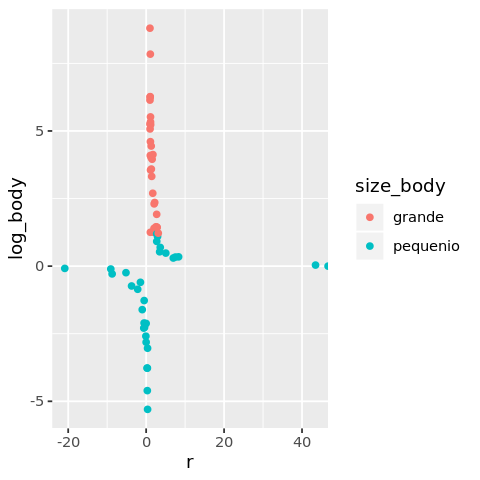

In [107]:
ggplot(new_log_mammals, aes(x= r, y=log_body)) +
  geom_point(aes(color=size_body))

## Ejercicio 3
Considérese el dataset randu (ejecutar ?randu para una descripción):<br>
**A.** Usar la función mean para calcular la media muestral en cada uno de los números que forman la tripleta: $x, y, z$. Asimismo usar la función var para calcular una matriz de varianzas y covarianzas muestral.

In [44]:
head(randu)

x,y,z
<dbl>,<dbl>,<dbl>
0.000031,0.000183,0.000824
0.044495,0.155732,0.533939
0.822440,0.873416,0.838542
0.322291,0.648545,0.990648
0.393595,0.826873,0.418881
0.309097,0.926590,0.777664


In [45]:
stat_randu <- randu %>%
      summarise(prom_x = mean(x),
              prom_y = mean(y),
              prom_z = mean(z))
head(stat_randu)

prom_x,prom_y,prom_z
<dbl>,<dbl>,<dbl>
0.5264293,0.4860531,0.4809547


In [46]:
# ejecutandolo como un vector para comprobación
print(c(mean(randu$x),mean(randu$y),mean(randu$z)))

[1] 0.5264293 0.4860531 0.4809547


In [47]:
# varianzas y covarianzas
varcov_randu <- var(randu)
varcov_randu

,x,y,z
x,0.081231885,-0.004057683,0.004637656
y,-0.004057683,0.086270206,-0.005148432
z,0.004637656,-0.005148432,0.077860433


**B.** Queremos ver la distribución del promedio por renglón de cada observación del dataset randu, para esto utilizar la función de apply para calcular tal promedio, alternativamente usar rowMeans.

In [48]:
# hacerlo con rowmeans para comprobación
fil_mean <- apply(randu, MARGIN = 1, mean) #margin = 1 para realizar la operación en filas
head(fil_mean)

1         2         3         4         5         6 
0.0003460 0.2447220 0.8447993 0.6538280 0.5464497 0.6711170

In [49]:
fil_prom = rowMeans(randu)
head(fil_prom)

1         2         3         4         5         6 
0.0003460 0.2447220 0.8447993 0.6538280 0.5464497 0.6711170

**C.** Utilizar la función hist del paquete base para calcular un histograma con los breaks definido por tal función.

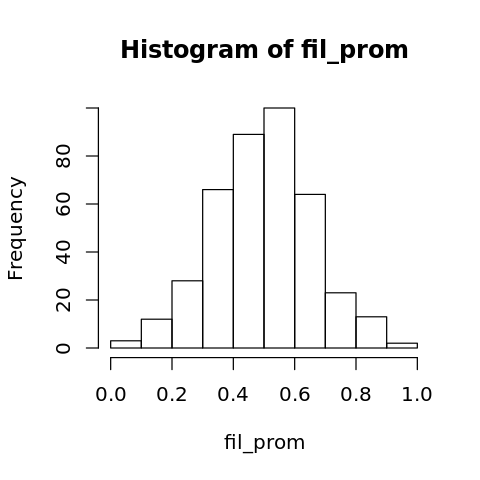

In [50]:
hist(fil_prom)

**D.** Calcular sus propios breaks y volver a graficar el histograma con hist y con geom_histogram del paquete ggplot2.

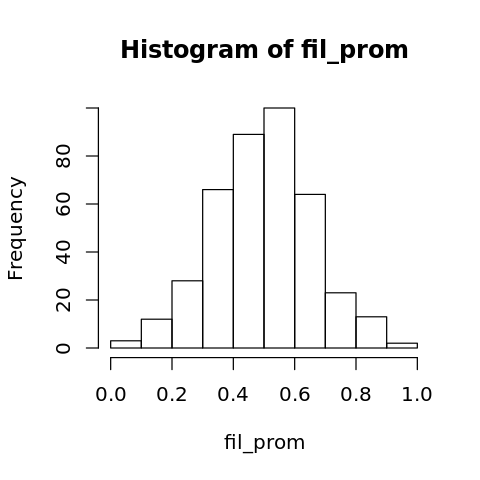

In [51]:
# hist
hist(fil_prom, breaks=10)


In [52]:
histo_df <- cbind(randu, fil_prom)
head(histo_df)

x,y,z,fil_prom
<dbl>,<dbl>,<dbl>,<dbl>
0.000031,0.000183,0.000824,0.0003460
0.044495,0.155732,0.533939,0.2447220
0.822440,0.873416,0.838542,0.8447993
0.322291,0.648545,0.990648,0.6538280
0.393595,0.826873,0.418881,0.5464497
0.309097,0.926590,0.777664,0.6711170


In [53]:
hg_fprom <- ggplot(histo_df, aes(fil_prom))

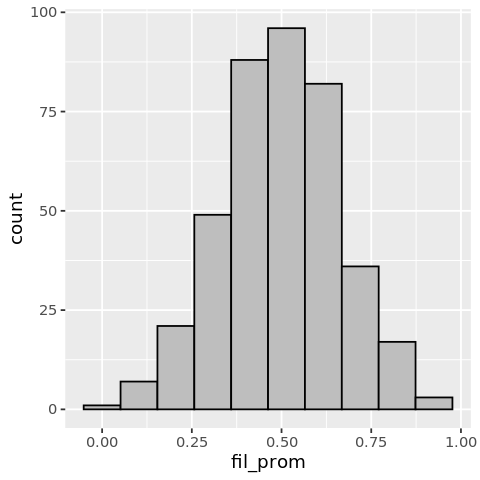

In [54]:
# Realizar el mismo gráfico pero con ggplot
hg_fprom+
  geom_histogram(bins=10, col='black', fill='grey')

**E.** Utilizar la función qqnorm para comparar los cuantiles de una distribución normal con la distribución de las medias muestrales obtenidos en el inciso b). Sólo de forma visual ¿qué se puede concluir sobre la distribución de las medias muestrales calculadas en b)? (puedes añadir una línea al gráfico con qqline).

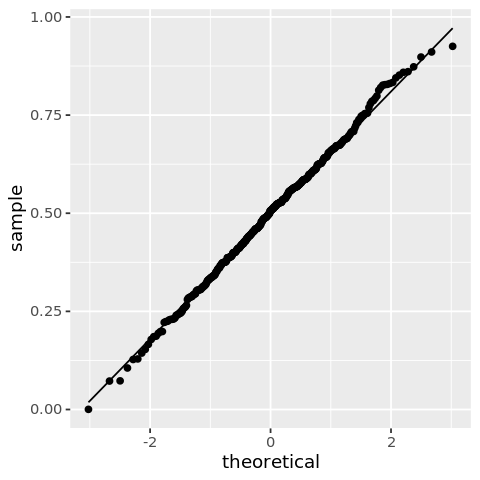

In [56]:
ggplot(histo_df, aes(sample=fil_prom)) +
  stat_qq() +
  stat_qq_line()

En el gráico de cuantil-cuantil, la distribución teóricaparece ajustarse bastante bien a la obtenida de la muestra del promedio de los números de las filas del data set randu, por lo que gráficamente se puede pensar que esta variable se distribuye como una d. normal. 


## Ejercicio 4
Realizar gráficas con el comando qqplot para comparar $2$ distribuciones de datos, por ejemplo:

In [57]:
options(repr.plot.width=4, repr.plot.height=4)#esta línea sólo se ejecuta para jupyterlab con R

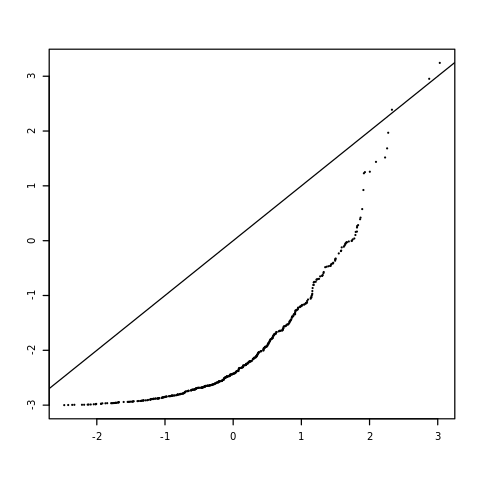

In [58]:
n<-500
set.seed(2000)
par(cex=0.5) #control size of labels
datos<- qqplot(rnorm(n), rexp(n)-3, cex=.1, xlab='', ylab='')
abline(0,1) #recta a 45 grados, sirve de apoyo para realizar comentarios



Realizar conclusiones de sus gráficas qqplot. Por ejemplo, sin utilizar la información de cuáles distribuciones se han generado los datos, ni cuáles están en el eje vertical ni horizontal del gráfico anterior se puede establecer: "en el gráfico anterior se observa que una de las distribuciones está sesgada respecto a la otra. Este tipo de gráfica es similar al de una distribución sesgada a la derecha por lo que o bien, la cola izquierda de la otra distribución está más cercana a la mediana o tiene colas ligeras".


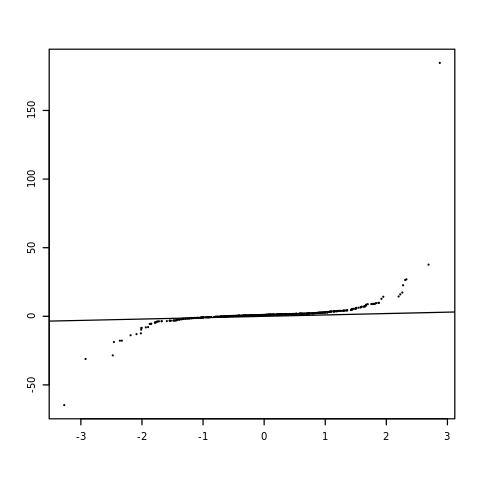

In [59]:
n<-500
set.seed(2000)
sim_plot = rcauchy(n) +1
norm_plot = rnorm(n)
par(cex=0.5) #control size of labels
datos<- qqplot(norm_plot, sim_plot, cex=.1, xlab='', ylab='')
abline(0,1) #recta a 45 grados, sirve de apoyo para realizar comentarios

De acuerdo al gráfico anterior se puede ver que la distribución de datos simulada se parece a la distribución normal (línea de 45 grados) en el medio de la curva, sin embargo la situación no es equivalente para los extremos, donde se podría inferir que se están incluyendo importantes valores extremos en la simulación. Lo anterior implica que las colas de la distirbución son bastante alargadas. 

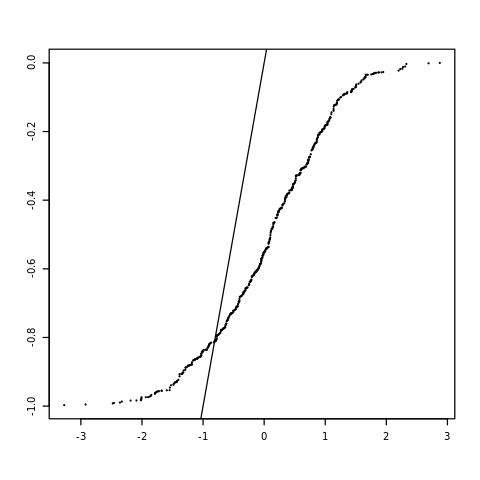

In [60]:
n<-500
set.seed(2000)
sim_plot = runif(n )-1
norm_plot = rnorm(n)
par(cex=0.5) #control size of labels
datos<- qqplot(norm_plot, sim_plot, cex=.1, xlab='', ylab='')
abline(0,1) #recta a 45 grados, sirve de apoyo para realizar comentarios

Al comparar la gráfica de la distribución simulada, se observa que inicia siendo convexa para posteriormente ser cóncava, lo que puede sugerir la existencia de multimodalidad. Si se conpara con la línea recta de los cuantiles de la distribución normal, es viable la notable desviación, lo que reafirma el sesgo existente mencionado con anterioridad. 